## 第五题代码

In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dt.csv',index_col=0)

In [3]:
df.loc[df['Age']==' [31,40]','Age']='[31,40]'
df.loc[df['Age']==' >40','Age']='>40'

In [4]:
df

,Age,Incoming,Student,Credit Rating,Buying
User id,,,,,
1,<=30,high,no,fair,no
2,<=30,high,no,excellent,no
3,"[31,40]",high,no,fair,yes
4,>40,medium,no,fair,yes
5,>40,low,yes,fair,yes
6,>40,low,yes,excellent,no
7,"[31,40]",low,yes,excellent,yes
8,<=30,medium,no,fair,no
9,<=30,low,yes,fair,yes


In [5]:
dict_age={'<=30':1,'[31,40]':2,'>40':3}
dict_incoming={'low':1,'medium':2,'high':3}
dict_student={'yes':1,'no':0}
dict_credit={'fair':0,'excellent':1}
dict_buy={'yes':1,'no':0}

In [6]:
df_copy=df.copy()

In [7]:
df_copy.iloc[:,0]=df_copy.iloc[:,0].map(dict_age)
df_copy.iloc[:,1]=df_copy.iloc[:,1].map(dict_incoming)
df_copy.iloc[:,2]=df_copy.iloc[:,2].map(dict_student)
df_copy.iloc[:,3]=df_copy.iloc[:,3].map(dict_credit)
df_copy.iloc[:,4]=df_copy.iloc[:,4].map(dict_buy)


In [8]:
df_copy

,Age,Incoming,Student,Credit Rating,Buying
User id,,,,,
1,1,3,0,0,0
2,1,3,0,1,0
3,2,3,0,0,1
4,3,2,0,0,1
5,3,1,1,0,1
6,3,1,1,1,0
7,2,1,1,1,1
8,1,2,0,0,0
9,1,1,1,0,1


In [9]:
df_feature,df_label=df_copy.iloc[:,:4],df_copy.iloc[:,4]

In [15]:
clf = tree.DecisionTreeClassifier(criterion="gini")
score1=clf.fit(df_feature, df_label)

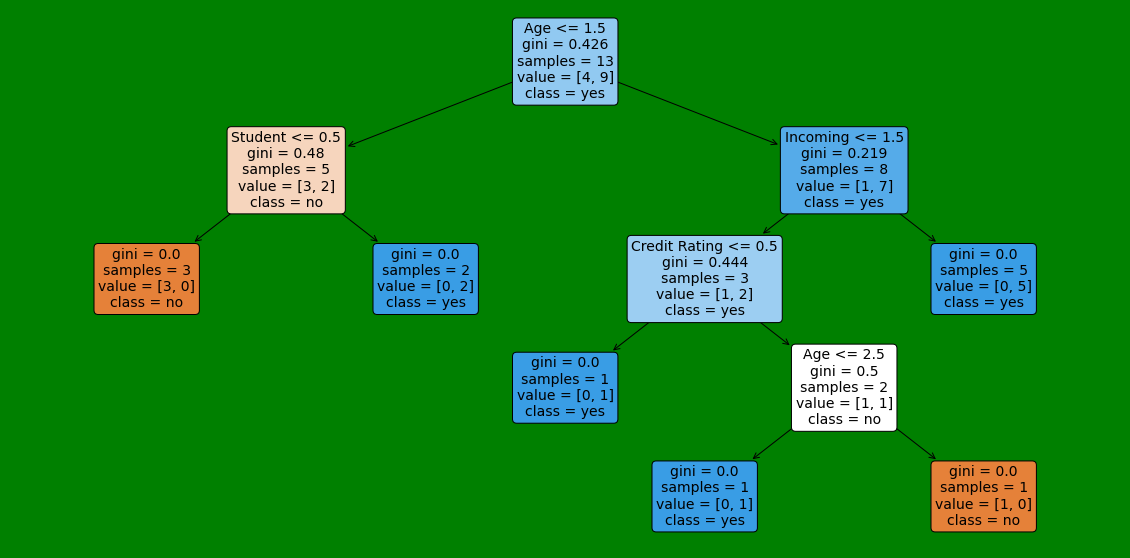

In [16]:
plt.figure(figsize=(20,10), facecolor= 'g')
a = tree.plot_tree(score1,
                    feature_names = df_copy.columns[:4],
                    class_names= ["no","yes"],
                    rounded=True,
                    filled= True,
                    fontsize=14)
plt.show()
